In [56]:
import pandas as pd

df=pd.read_csv("/Users/devalpatel/Downloads/house-prices-advanced-regression-techniques/train.csv", index_col=0)
df_test = pd.read_csv("/Users/devalpatel/Downloads/house-prices-advanced-regression-techniques/test.csv", index_col=0)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

[]

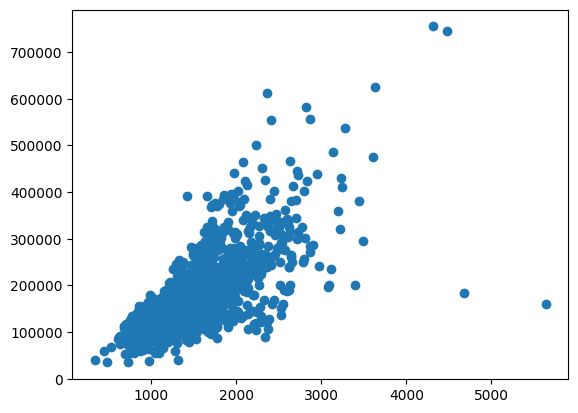

In [58]:
import matplotlib.pyplot as pyplt

ax = pyplt.subplot()

ax.scatter(x=df["GrLivArea"], y=df["SalePrice"])

ax.plot()

In [59]:
# Removing two outlier points

df.drop(df[(df["GrLivArea"]>4000) & (df["SalePrice"]<300000)].index, inplace=True)
df.shape

(1458, 80)

/var/folders/hm/_76q6rz57lg2zgt5jqx4pcpm0000gn/T/ipykernel_4815/1369355349.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["SalePrice"], fit=norm)


[]

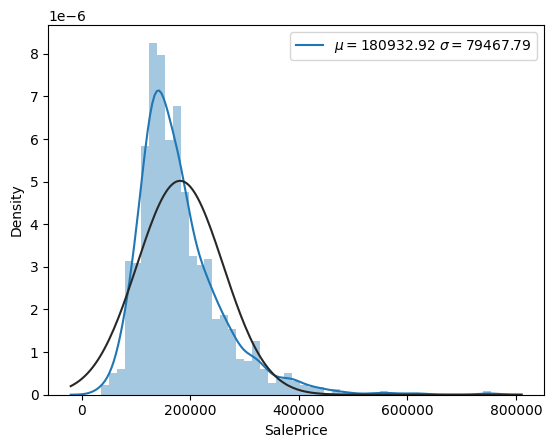

In [60]:
# Examining target variable distribution
import seaborn as sns
from scipy.stats import norm, skew

sns.distplot(df["SalePrice"], fit=norm)
mu, sigma = norm.fit(df["SalePrice"])
pyplt.legend(["$\mu = ${:.2f} $\sigma = ${:.2f}".format(mu, sigma)])
pyplt.plot()

In [61]:
df["SalePrice"].unique()

array([208500, 181500, 223500, 140000, 250000, 143000, 307000, 200000,
       129900, 118000, 129500, 345000, 144000, 279500, 157000, 132000,
       149000,  90000, 159000, 139000, 325300, 139400, 230000, 154000,
       256300, 134800, 306000, 207500,  68500,  40000, 149350, 179900,
       165500, 277500, 309000, 145000, 153000, 109000,  82000, 160000,
       170000, 130250, 141000, 319900, 239686, 249700, 113000, 127000,
       177000, 114500, 110000, 385000, 130000, 180500, 172500, 196500,
       438780, 124900, 158000, 101000, 202500, 219500, 317000, 180000,
       226000,  80000, 225000, 244000, 185000, 144900, 107400,  91000,
       135750, 136500, 193500, 153500, 245000, 126500, 168500, 260000,
       174000, 164500,  85000, 123600, 109900,  98600, 163500, 133900,
       204750, 214000,  94750,  83000, 128950, 205000, 178000, 118964,
       198900, 169500, 100000, 115000, 190000, 136900, 383970, 217000,
       259500, 176000, 155000, 320000, 163990, 136000, 153900, 181000,
      

In [62]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='box-cox')
df["SalePrice"] = pt.fit_transform(pd.DataFrame(df["SalePrice"]))
print(df["SalePrice"])
print(f"{pt.lambdas_}")



Id
1       0.570933
2       0.227643
3       0.741526
4      -0.424947
5       1.014751
          ...   
1456    0.136756
1457    0.588578
1458    1.169545
1459   -0.386721
1460   -0.292716
Name: SalePrice, Length: 1458, dtype: float64
[-0.07712952]


In [63]:
df = df[df["SalePrice"].isna()==False]
df.shape

(1458, 80)

/var/folders/hm/_76q6rz57lg2zgt5jqx4pcpm0000gn/T/ipykernel_4815/2869428669.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["SalePrice"])


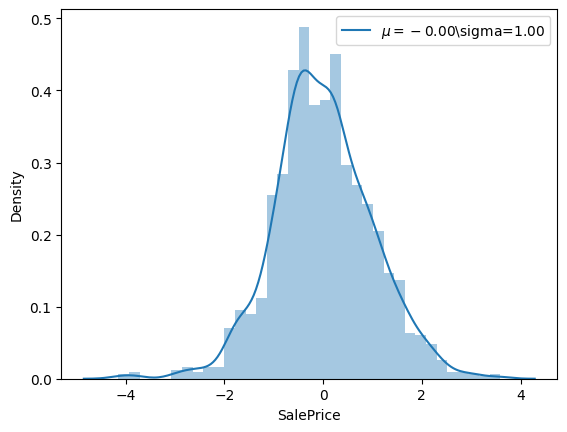

In [64]:
sns.distplot(df["SalePrice"])
mu, sigma = norm.fit(df["SalePrice"])

pyplt.legend(['$\mu = {:.2f} $\sigma={:.2f}'.format(mu, sigma)])
pyplt.show()

Y_train = df["SalePrice"]
df.drop(columns=["SalePrice"], inplace=True)

In [65]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression

In [66]:
df["Alley"].fillna( "None", inplace=True)
df["MasVnrType"].fillna( "None", inplace=True)
df["MasVnrArea"].fillna(0, inplace=True)

df_test["Alley"].fillna( "None", inplace=True)
df_test["MasVnrType"].fillna( "None", inplace=True)
df_test["MasVnrArea"].fillna(0, inplace=True)

/var/folders/hm/_76q6rz57lg2zgt5jqx4pcpm0000gn/T/ipykernel_4815/161341136.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Alley"].fillna( "None", inplace=True)
/var/folders/hm/_76q6rz57lg2zgt5jqx4pcpm0000gn/T/ipykernel_4815/161341136.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves 

In [67]:
lst = ["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageYrBlt", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]

for col in lst:
    df[col].fillna("None", inplace=True)
    df_test[col].fillna("None", inplace=True)

df["Electrical"].fillna("SBrkr", inplace=True)
df_test["Electrical"].fillna("SBrkr", inplace=True)

/var/folders/hm/_76q6rz57lg2zgt5jqx4pcpm0000gn/T/ipykernel_4815/3688269310.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna("None", inplace=True)
/var/folders/hm/_76q6rz57lg2zgt5jqx4pcpm0000gn/T/ipykernel_4815/3688269310.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

In [68]:
df['LotFrontage']=df.groupby("Neighborhood")['LotFrontage'].transform(lambda x: x.fillna(x.median()))
df_test['LotFrontage']=df_test.groupby("Neighborhood")['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [69]:
df.info()
print(df.shape)
print(df_test.shape)


<class 'pandas.core.frame.DataFrame'>
Index: 1458 entries, 1 to 1460
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1458 non-null   int64  
 1   MSZoning       1458 non-null   object 
 2   LotFrontage    1458 non-null   float64
 3   LotArea        1458 non-null   int64  
 4   Street         1458 non-null   object 
 5   Alley          1458 non-null   object 
 6   LotShape       1458 non-null   object 
 7   LandContour    1458 non-null   object 
 8   Utilities      1458 non-null   object 
 9   LotConfig      1458 non-null   object 
 10  LandSlope      1458 non-null   object 
 11  Neighborhood   1458 non-null   object 
 12  Condition1     1458 non-null   object 
 13  Condition2     1458 non-null   object 
 14  BldgType       1458 non-null   object 
 15  HouseStyle     1458 non-null   object 
 16  OverallQual    1458 non-null   int64  
 17  OverallCond    1458 non-null   int64  
 18  YearBuilt    

In [70]:
df_temp_train = df.copy()

df = pd.concat([df, df_test], axis=0)
print(df.shape)

for col in df.columns:
    if df[col].dtype == "object":
        df = pd.get_dummies(columns=[col], data=df, drop_first=True)
        

df_train = df.iloc[:len(Y_train),:]
df_test = df.iloc[len(Y_train):,:]

df = df_train

df_temp = df.copy()
print(df_temp.shape)
print(df_test.shape)

(2917, 79)
(1458, 360)
(1459, 360)


In [71]:

rc = RobustScaler()
df = rc.fit_transform(df)

In [72]:
X_train  = df
lr = LinearRegression()
lr.fit(X_train, Y_train) 

LinearRegression()

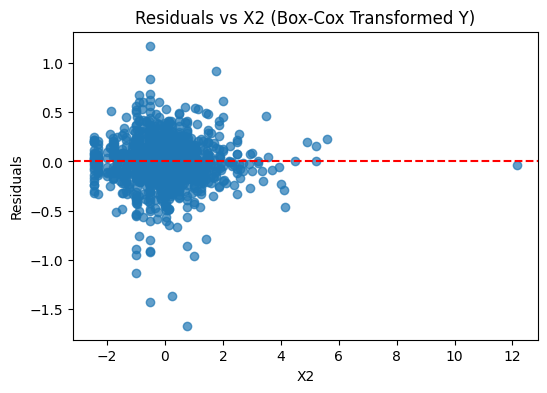

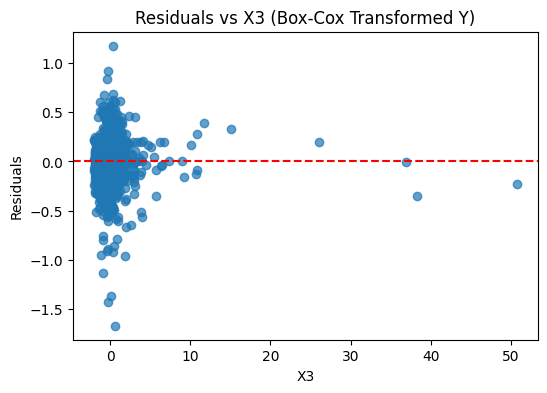

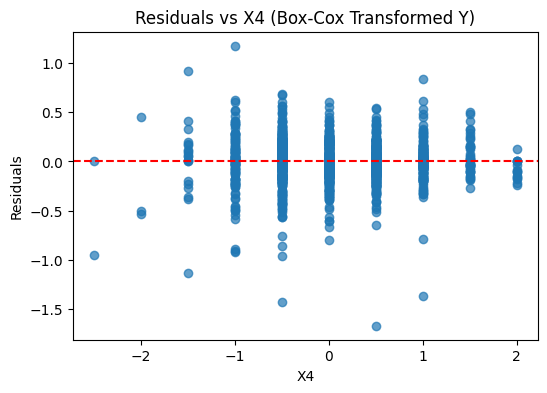

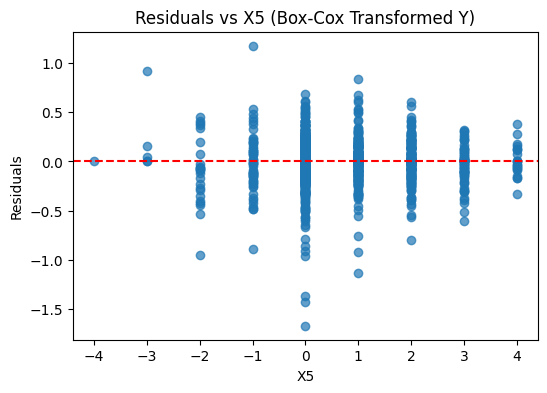

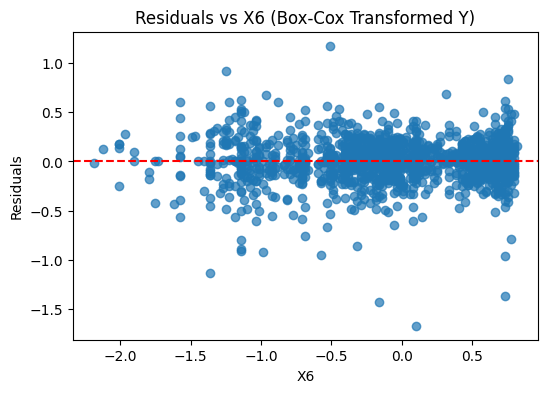

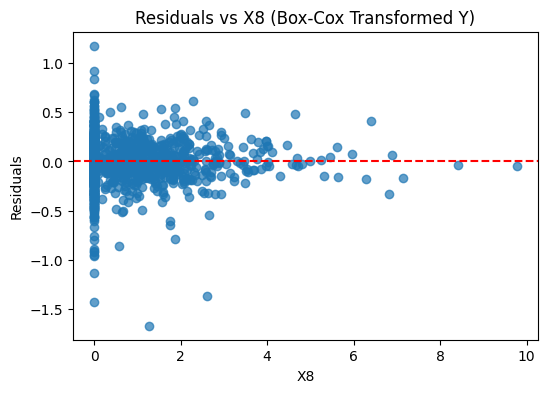

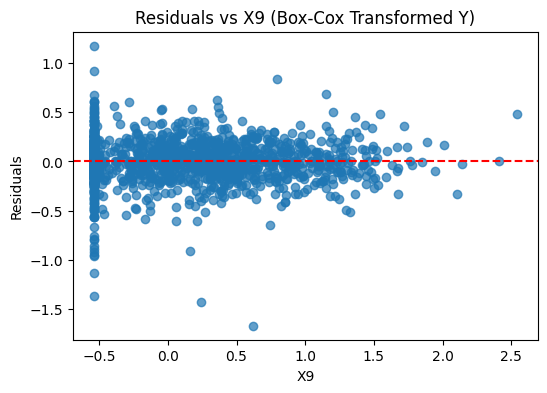

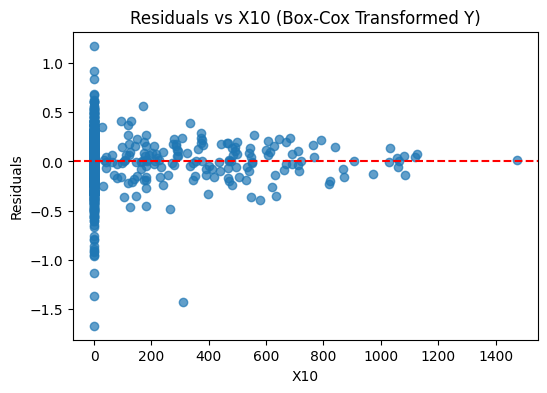

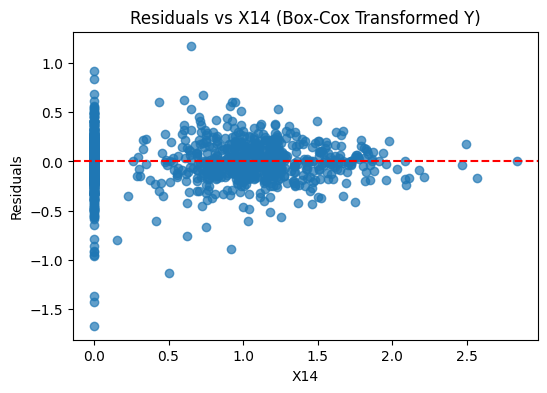

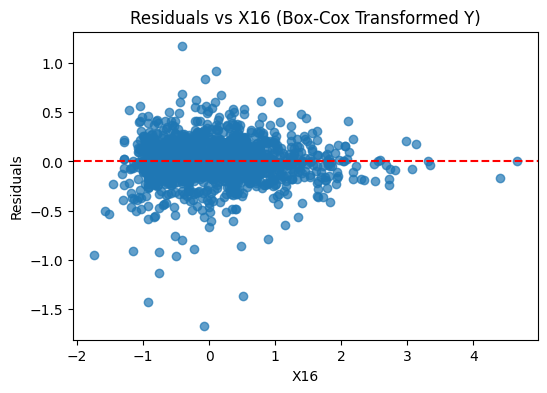

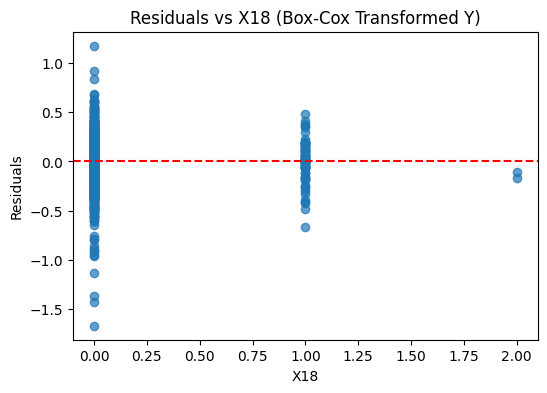

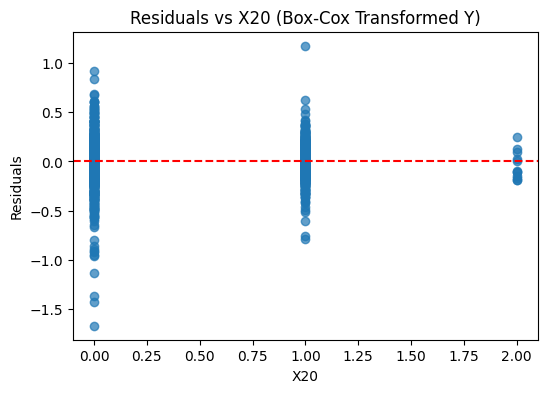

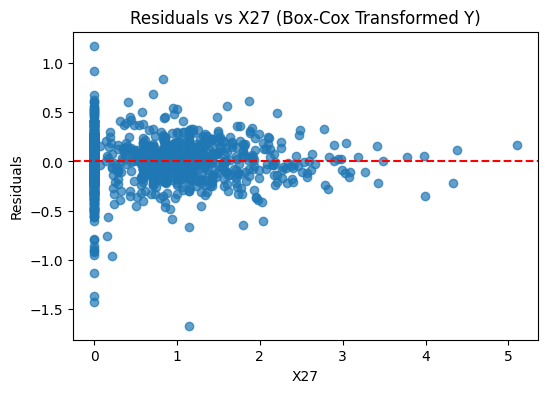

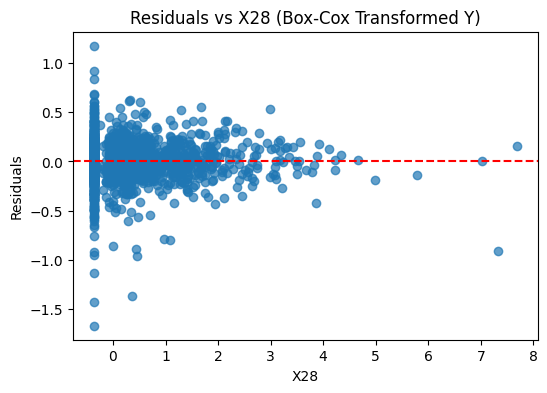

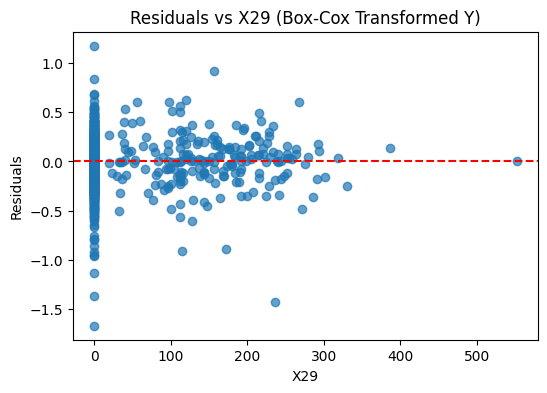

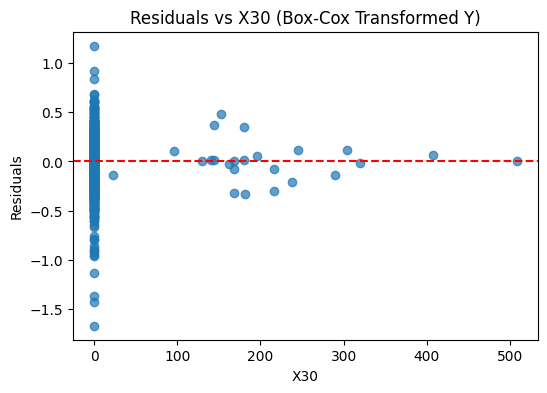

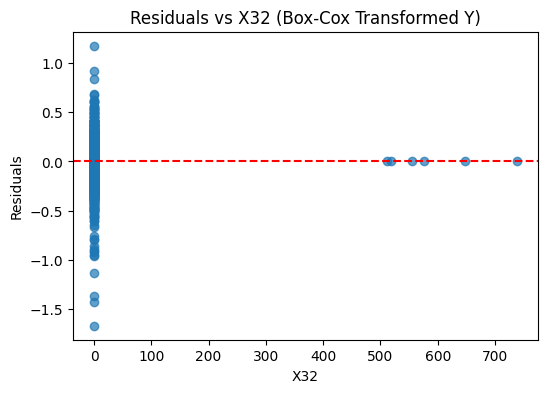

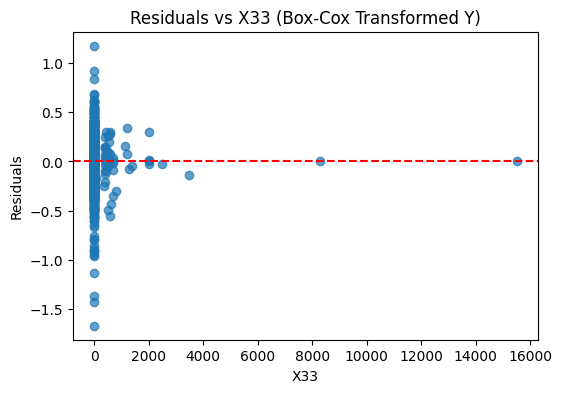

In [73]:
from library_functions_jupyter.libs import *

residual_plots_y_vs_predictors(X_train, Y_train, use_column_ids=[13, 15, 17, 19, 8, 7, 5, 9, 4, 3, 2, 1, 26, 28, 27, 29, 31, 32])


/var/folders/hm/_76q6rz57lg2zgt5jqx4pcpm0000gn/T/ipykernel_4815/478998259.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[:, 1])


<Axes: ylabel='Density'>

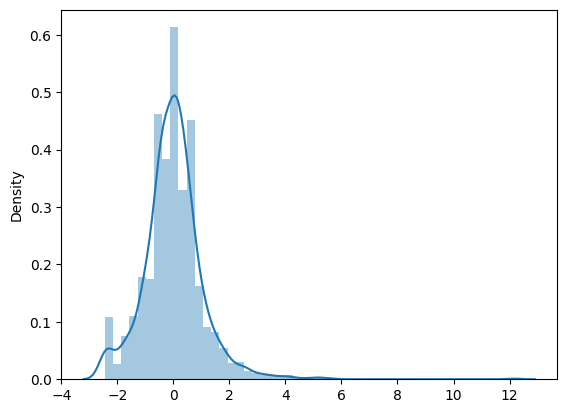

In [74]:
sns.distplot(df[:, 1])

/var/folders/hm/_76q6rz57lg2zgt5jqx4pcpm0000gn/T/ipykernel_4815/398362557.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[:, 2])


<Axes: ylabel='Density'>

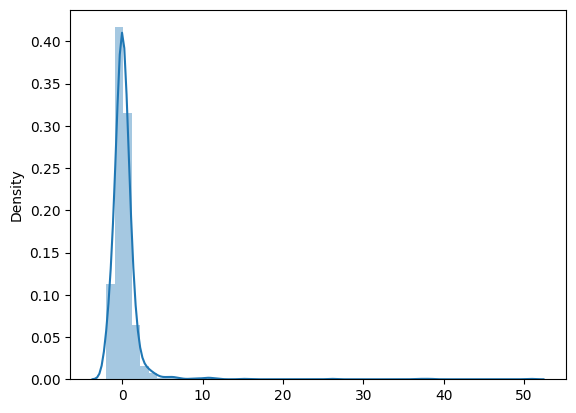

In [75]:
sns.distplot(df[:, 2])


/var/folders/hm/_76q6rz57lg2zgt5jqx4pcpm0000gn/T/ipykernel_4815/3016580365.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[:, 3])


<Axes: ylabel='Density'>

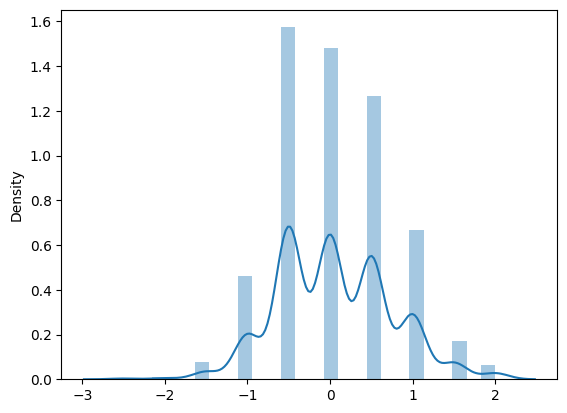

In [76]:
sns.distplot(df[:, 3])


/var/folders/hm/_76q6rz57lg2zgt5jqx4pcpm0000gn/T/ipykernel_4815/3481502101.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[:, 31])


<Axes: ylabel='Density'>

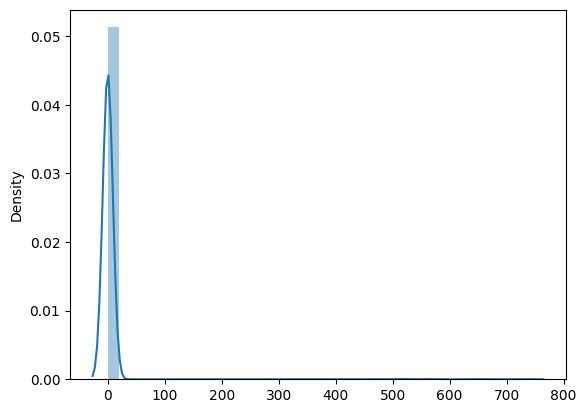

In [77]:
sns.distplot(df[:, 31])


/var/folders/hm/_76q6rz57lg2zgt5jqx4pcpm0000gn/T/ipykernel_4815/1287818251.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[:, 4])


<Axes: ylabel='Density'>

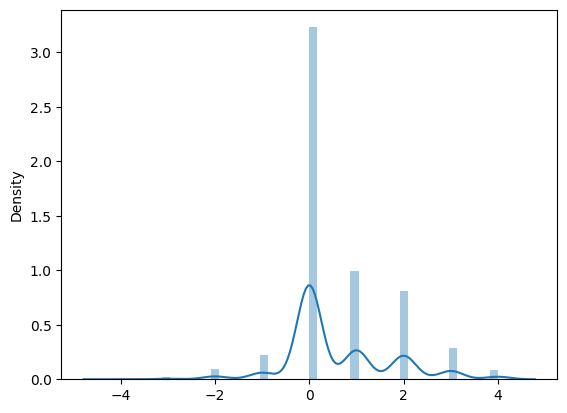

In [78]:
sns.distplot(df[:, 4])

/var/folders/hm/_76q6rz57lg2zgt5jqx4pcpm0000gn/T/ipykernel_4815/2977079086.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[:, 9])


<Axes: ylabel='Density'>

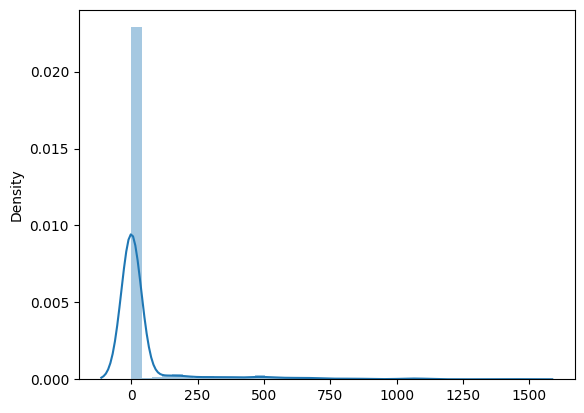

In [79]:
sns.distplot(df[:, 9])


/var/folders/hm/_76q6rz57lg2zgt5jqx4pcpm0000gn/T/ipykernel_4815/975712934.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[:, 5])


<Axes: ylabel='Density'>

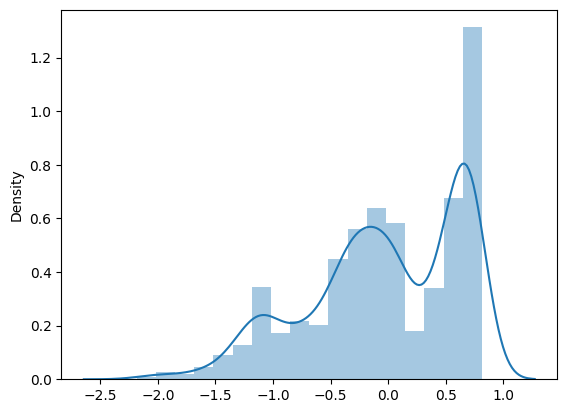

In [80]:
sns.distplot(df[:, 5])


/var/folders/hm/_76q6rz57lg2zgt5jqx4pcpm0000gn/T/ipykernel_4815/3503086112.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[:, 7])


<Axes: ylabel='Density'>

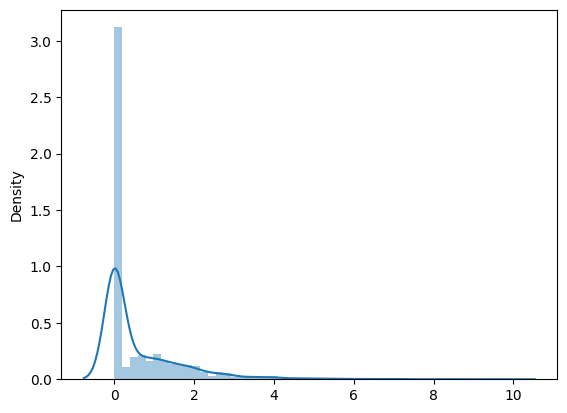

In [81]:
sns.distplot(df[:, 7])


/var/folders/hm/_76q6rz57lg2zgt5jqx4pcpm0000gn/T/ipykernel_4815/3330730541.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[:, 32])


<Axes: ylabel='Density'>

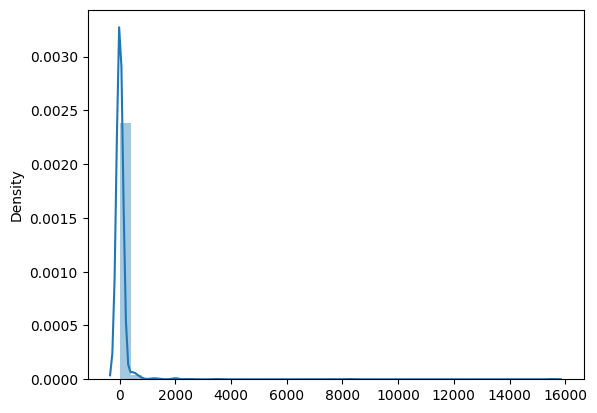

In [82]:
sns.distplot(df[:, 32])


/var/folders/hm/_76q6rz57lg2zgt5jqx4pcpm0000gn/T/ipykernel_4815/1661916394.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[:, 8])


<Axes: ylabel='Density'>

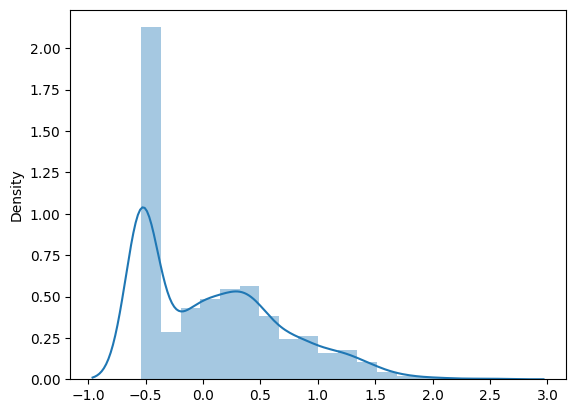

In [83]:
sns.distplot(df[:, 8])


/var/folders/hm/_76q6rz57lg2zgt5jqx4pcpm0000gn/T/ipykernel_4815/3936683494.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[:, 14])


<Axes: ylabel='Density'>

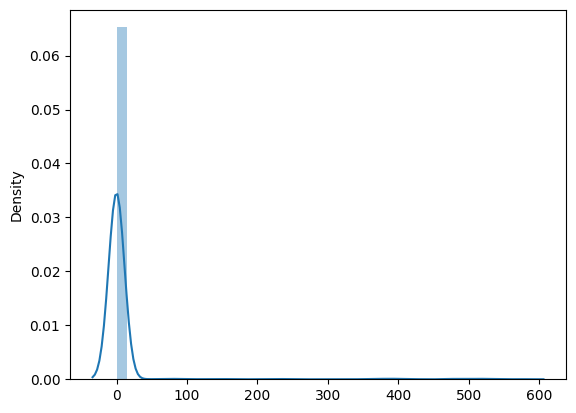

In [84]:
sns.distplot(df[:, 14])


/var/folders/hm/_76q6rz57lg2zgt5jqx4pcpm0000gn/T/ipykernel_4815/3330730541.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[:, 32])


<Axes: ylabel='Density'>

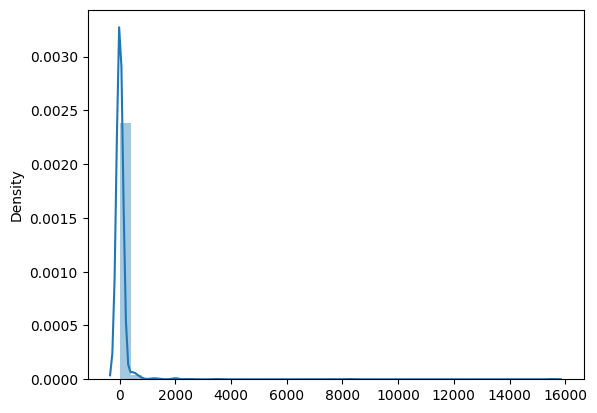

In [85]:
sns.distplot(df[:, 32])


In [86]:
df_test.head()
df_temp.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,False,False,False,False,True,False,False,False,True,False
2,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,False,False,False,False,True,False,False,False,True,False
3,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,False,False,False,False,True,False,False,False,True,False
4,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,False,False,False,False,True,False,False,False,False,False
5,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,False,False,False,False,True,False,False,False,True,False


In [87]:
df_temp.shape

(1458, 360)

In [88]:
df_test.shape

(1459, 360)

In [89]:
df_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,False,False,False,False,True,False,False,False,True,False
1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,False,False,False,False,True,False,False,False,True,False
1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,False,False,False,False,True,False,False,False,True,False
1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,False,False,False,False,True,False,False,False,True,False
1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,False,False,False,False,True,False,False,False,True,False


In [90]:
# Following Columns doesn't seem to follow constant variance in residual assumption From above plots

# 13, 14, 15, 17, 19, 8, 7, 5, 9, 4, 3, 2, 1, 26, 28, 27, 29, 31, 32

# Applying Box-cox Transformation to each of them before training again


(2917, 1)


/var/folders/hm/_76q6rz57lg2zgt5jqx4pcpm0000gn/T/ipykernel_4815/4143676827.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Id
1        854.05
2          0.05
3        866.05
4        756.05
5       1053.05
         ...   
1456     694.05
1457       0.05
1458    1152.05
1459       0.05
1460       0.05
Name: 2ndFlrSF, Length: 1458, dtype: float64' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_train.iloc[:,13] += 0.05
/var/folders/hm/_76q6rz57lg2zgt5jqx4pcpm0000gn/T/ipykernel_4815/4143676827.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Id
1461       0.05
1462       0.05
1463     701.05
1464     678.05
1465       0.05
         ...   
2915     546.05
2916     546.05
2917       0.05
2918       0.05
2919    1004.05
Name: 2ndFlrSF, Length: 1459, dtype: float64' has dtype incompatible with int64, 

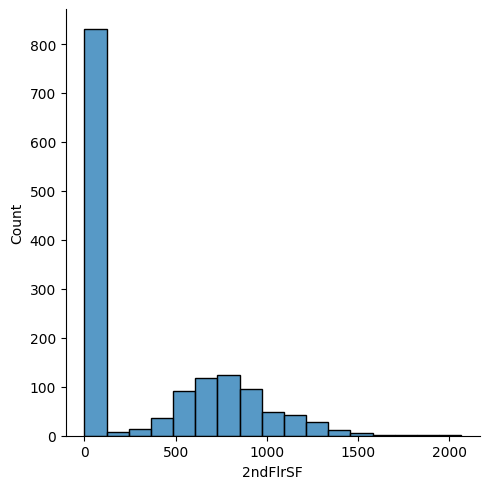

In [91]:
sns.displot(df_train.iloc[:,13])
df_train = df_temp

df_train.iloc[:,13] += 0.05
df_test.iloc[:,13] += 0.05

from sklearn.preprocessing import power_transform

df_t = pd.concat([df_train.iloc[:, 13],df_test.iloc[:, 13] ]).copy()
df_t = power_transform(pd.DataFrame(df_t), method='box-cox')
print(df_t.shape)
df_train.iloc[:, 13]= df_t[:len(Y_train), 0]
df_test.iloc[:, 13]= df_t[len(Y_train):, 0]

In [92]:
df_test.iloc[:,13]
df_test.iloc[:,13].shape

(1459,)

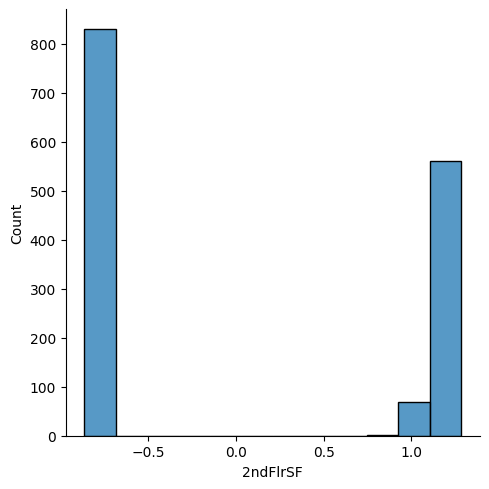

In [93]:
sns.displot(df_train.iloc[:,13])

In [94]:
# making features non negative for Box-Cox Transformation to be applicable

for i in [14, 15, 17, 19, 8, 7, 5, 9, 4, 3, 2, 1, 26, 28, 27, 29, 31, 32]:
    print(f"i :{i} {min(df_train.iloc[:, i ].min(),df_test.iloc[:, i ].min())}")
    if min(df_train.iloc[:, i ].min(),df_test.iloc[:, i ].min())<=0:
        df_train.iloc[:, i ] += -min(df_train.iloc[:, i ].min(),df_test.iloc[:, i ].min())+0.05
        df_test.iloc[:, i ] += -min(df_train.iloc[:, i ].min(),df_test.iloc[:, i ].min())+0.05
        

i :14 0
i :15 334
i :17 0.0
i :19 0
i :8 0.0
i :7 0.0
i :5 1872
i :9 0.0
i :4 1
i :3 1
i :2 1300
i :1 21.0
i :26 0
i :28 0
i :27 0
i :29 0
i :31 0
i :32 0


/var/folders/hm/_76q6rz57lg2zgt5jqx4pcpm0000gn/T/ipykernel_4815/1404395671.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Id
1       0.05
2       0.05
3       0.05
4       0.05
5       0.05
        ... 
1456    0.05
1457    0.05
1458    0.05
1459    0.05
1460    0.05
Name: LowQualFinSF, Length: 1458, dtype: float64' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_train.iloc[:, i ] += -min(df_train.iloc[:, i ].min(),df_test.iloc[:, i ].min())+0.05
/var/folders/hm/_76q6rz57lg2zgt5jqx4pcpm0000gn/T/ipykernel_4815/1404395671.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Id
1461    0.05
1462    0.05
1463    0.05
1464    0.05
1465    0.05
        ... 
2915    0.05
2916    0.05
2917    0.05
2918    0.05
2919    0.05
Name: LowQualFinSF, Length: 1459, dtype: float64' has dtype incompatible with int64

In [95]:
# Box-Cox Transformation for all selected columns
for i in [14, 15, 17, 19, 8, 7, 5, 9, 4, 3, 2, 1, 26, 28, 27, 29, 31, 32]:
    df_t = pd.concat([df_train.iloc[:, i],df_test.iloc[:, i] ]).copy()
    df_t = pd.DataFrame(power_transform(pd.DataFrame(df_t), method='box-cox'))

    df_train.iloc[:, i]= df_t[:len(Y_train)]
    df_test.iloc[:, i]= df_t[len(Y_train):]
    df_train, Y_train = df_train[df_train.iloc[:,i].isna()==False], Y_train[df_train.iloc[:,i].isna()==False] 
    df_test.iloc[:,i].fillna(df_test.iloc[:,i].median(), inplace=True)

for i in range(len(df_test.columns)):
    df_test.iloc[:,i].fillna(df_test.iloc[:,i].median(), inplace=True)

print(df_test.shape)

/var/folders/hm/_76q6rz57lg2zgt5jqx4pcpm0000gn/T/ipykernel_4815/1203593228.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test.iloc[:,i].fillna(df_test.iloc[:,i].median(), inplace=True)
/var/folders/hm/_76q6rz57lg2zgt5jqx4pcpm0000gn/T/ipykernel_4815/1203593228.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0       0.567829
1      -0.372592
2       0.702971
3       0.580519
4       1.349887
          ...   
1453    0.451277
1454    1.167097
145

(1459, 360)


/var/folders/hm/_76q6rz57lg2zgt5jqx4pcpm0000gn/T/ipykernel_4815/1203593228.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0      -0.482625
1       2.090453
2      -0.482625
3      -0.482625
4      -0.482625
          ...   
1447    1.275751
1448   -0.482625
1449   -0.482625
1450   -0.482625
1451   -0.482625
Name: 0, Length: 1452, dtype: float64' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_train.iloc[:, i]= df_t[:len(Y_train)]
/var/folders/hm/_76q6rz57lg2zgt5jqx4pcpm0000gn/T/ipykernel_4815/1203593228.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '1452    0.421127
1453    0.421127
1454   -0.482625
1455    0.421127
1456   -0.482625
          ...   
2906    1.275751
2907   -0.482625
2908    1.275751
2909   -0.482625
2910   -0.482625
Name: 0, Length: 1459, dtype: float64' has dtype incompatib

In [96]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
df_train = sc.fit_transform(df_train)
df_test= sc.transform(df_test)

print(Y_train)

Id
1       0.570933
2       0.227643
3       0.741526
4      -0.424947
5       1.014751
          ...   
1441    0.354357
1442   -0.262058
1443    1.532713
1444   -0.797349
1445    0.201443
Name: SalePrice, Length: 1443, dtype: float64


In [97]:
lr = LinearRegression()
lr.fit(df_train, Y_train)

LinearRegression()

In [98]:
#df_test.head()
Y_pred = lr.predict(df_test)

In [99]:
print(pt.lambdas_)

[-0.07712952]


In [100]:
Y_pred = pt.inverse_transform(Y_pred.reshape(-1,1))
print(Y_pred.shape)

(1459, 1)


/Users/devalpatel/Documents/Animation Works/Manim Projects/manimenv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(


In [101]:
import numpy as np

Y_pred = pd.DataFrame(Y_pred)
Y_pred["SalePrice"] = Y_pred.iloc[:,0]

In [102]:
Y_pred

,0,SalePrice
0,118887.057295,118887.057295
1,169137.715907,169137.715907
2,194151.661655,194151.661655
3,205052.176365,205052.176365
4,177213.994011,177213.994011
...,...,...
1454,80592.487404,80592.487404
1455,86811.808796,86811.808796
1456,167233.426532,167233.426532
1457,124462.965171,124462.965171


In [103]:
Y_pred.drop(columns=[0], inplace=True)

In [104]:
Y_pred

,SalePrice
0,118887.057295
1,169137.715907
2,194151.661655
3,205052.176365
4,177213.994011
...,...
1454,80592.487404
1455,86811.808796
1456,167233.426532
1457,124462.965171


In [105]:
Y_pred.to_csv("Pred_Result.csv", index=True)

In [106]:
Y_pred_train = lr.predict(df_train)

In [107]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print(mean_squared_error(Y_train, Y_pred_train))

0.06075485712071782


In [108]:
Y_train_inverse = pt.inverse_transform(Y_train.values.reshape(-1,1))
Y_train_pred_inverse = pt.inverse_transform(Y_pred_train.reshape(-1,1))

print(mean_absolute_error(Y_train_inverse, Y_train_pred_inverse))
print(Y_train_inverse.mean())
print(Y_train_inverse.std())

12530.707498565678
181074.5537075537
79644.6178044612


/Users/devalpatel/Documents/Animation Works/Manim Projects/manimenv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
/Users/devalpatel/Documents/Animation Works/Manim Projects/manimenv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(


In [109]:
print(np.concat([Y_train_inverse, Y_train_pred_inverse], axis=1))

pd.DataFrame(np.concat([Y_train_inverse, Y_train_pred_inverse], axis=1)).to_csv("Pred_Result.csv")

[[208500.         207250.44917788]
 [181500.         192086.56521816]
 [223500.         221317.41418112]
 ...
 [310000.         338282.47603004]
 [121000.          95965.08294222]
 [179600.         183678.98316172]]
